## Classification of Lifestyle Products

#### Fashion MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
# print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.18.0
Eager mode:  True
GPU is NOT AVAILABLE


In [3]:
# import the fashion mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
test_labels
# shows the class values of the dataset (0-9)

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# set the class names for the dataset

In [10]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#### Exploratory Data Analysis

In [11]:
type(fashion_mnist)
# shows the type of the dataset; it is a module dataset from the tensorflow library

module

In [12]:
train_images.shape
# shows the shape of the training images dataset; here  60,000 images of 28x28 pixels

(60000, 28, 28)

In [13]:
len(train_labels)
# shows the number of labels in the training labels dataset

60000

In [14]:
test_images.shape
# shows the shape of the test images dataset; here 10,000 images of 28x28 pixels

(10000, 28, 28)

#### Training Image Labels

In [16]:
# shows the first label in the training labels dataset
print('Training Lebel:')
print(train_labels[0])

print('Training Image:')
print(train_images[0])
#  shows the first image pixel values in the training images dataset; pixel values are between 0 and 255

Training Lebel:
9
Training Image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0 

In [17]:
np.max(train_images)
# shows the maximum pixel value in the training images dataset

255

#### Data Preprocessing

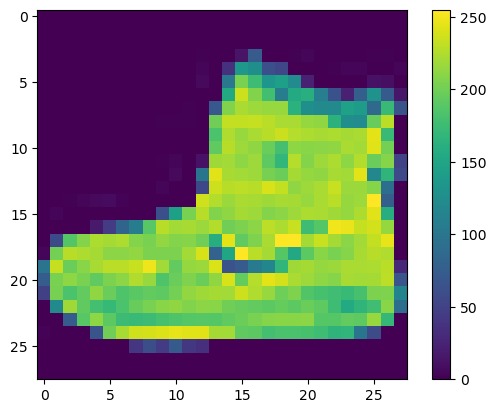

In [20]:
plt.figure()
plt.imshow(train_images[0]) # shows the first image in the training images dataset
plt.colorbar() # shows the color bar
plt.grid(False) # removes the grid
plt.show()

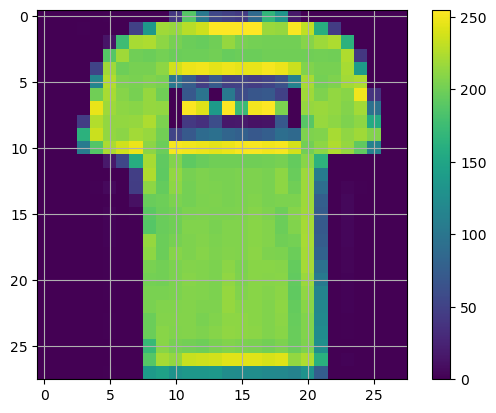

In [21]:
plt.figure()
plt.imshow(train_images[1]) # shows the second image in the training images dataset
plt.colorbar() # shows the color bar
plt.grid() # shows the grid
plt.show()

In [22]:
# normalizes the pixel values of the training and testing images dataset to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [23]:
print('Training Image:')
print(train_images[0])

Training Image:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

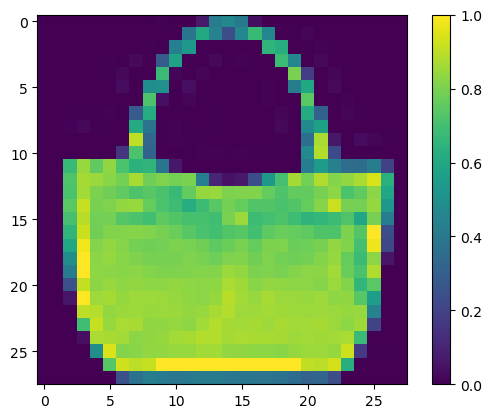

In [ ]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
# convert the pixel values 0 to 1, colorbar shows the pixel values

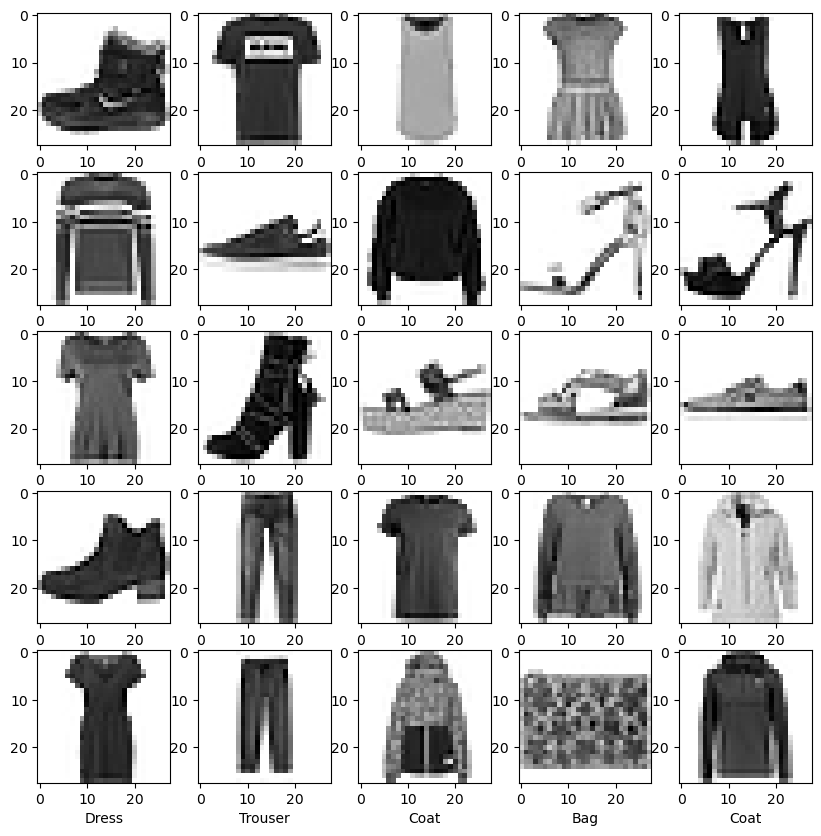

In [27]:
plt.figure(figsize=(10,10)) # sets the size of the figure
for i in range(25): # loops through the first 25 images in the training images dataset
    plt.subplot(5,5,i+1) # creates a subplot of 5x5, each row shows the 5 images and there are 5 columns
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # shows the images in binary color
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Model Build

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # flattens the input image to a 1D array
    keras.layers.Dense(128, activation='relu'), # fully connected layer with 128 nodes
    keras.layers.Dense(10, activation='softmax') # fully connected layer with 10 nodes
])
# creates a sequential model with 3 layers; input layer, hidden layer and output layer
# relu is the activation function for the hidden layer and softmax is the activation function for the output layer


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# compiles the model with the optimizer, loss function and metrics
model.compile(
    optimizer = 'adam',  # adam is the optimizer, helps to minimize the loss function
    loss = 'sparse_categorical_crossentropy', # sparse_categorical_crossentropy computes the crossentropy loss between the labels and predictions
    metrics = ['accuracy'] # accuracy is the metric to monitor the training and testing steps
)


In [30]:
# trains the model with the training images and labels dataset
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7805 - loss: 0.6217
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8630 - loss: 0.3789
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8769 - loss: 0.3363
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.8853 - loss: 0.3132
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8903 - loss: 0.2977
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8933 - loss: 0.2849
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.9016 - loss: 0.2641
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - accuracy: 0.9019 - loss: 0.2610
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9070 - loss: 0.2471
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9099 - loss: 0.2430


In [31]:
# Evaluates the model with the testing images and labels dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.8833 - loss: 0.3327

Test accuracy: 0.8801000118255615

Test loss: 0.33486607670783997
